In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
import io


uploaded = files.upload()


df = pd.read_csv(io.BytesIO(uploaded['student_performance_updated_1000.csv']))

print(" Dataset loaded successfully!")
print("Dataset shape:", df.shape)

df.head()

Saving student_performance_updated_1000.csv to student_performance_updated_1000.csv
 Dataset loaded successfully!
Dataset shape: (1000, 12)


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [6]:
df.columns


Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade', 'Study Hours', 'Attendance (%)', 'Online Classes Taken'],
      dtype='object')

In [7]:

df = df.drop(columns=['StudentID', 'Name'], errors='ignore')

df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('%', '').str.replace('/', '_')
print("Cleaned column names:\n", df.columns)

print("\nMissing values per column:")
print(df.isnull().sum())

df = df.dropna()

le = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le.fit_transform(df['Gender'])
if 'ParentalSupport' in df.columns:
    df['ParentalSupport'] = le.fit_transform(df['ParentalSupport'])
if 'ExtracurricularActivities' in df.columns:
    df['ExtracurricularActivities'] = le.fit_transform(df['ExtracurricularActivities'])

numeric_cols = ['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'Online_Classes_Taken']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\n Data cleaned and scaled successfully!")
df.head()


Cleaned column names:
 Index(['Gender', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade',
       'Study_Hours', 'Attendance_()', 'Online_Classes_Taken'],
      dtype='object')

Missing values per column:
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study_Hours                  0
Attendance_()                0
Online_Classes_Taken         0
dtype: int64

 Data cleaned and scaled successfully!


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study_Hours,Attendance_(),Online_Classes_Taken
0,1,-0.051987,-0.422342,0.006786,1,0,80.0,4.8,59.0,-0.995360
1,0,0.635131,0.364972,0.703087,2,2,87.0,2.2,70.0,1.004662
2,1,-1.013951,-1.209655,-1.286346,0,1,68.0,4.6,92.0,-0.995360
3,1,0.909978,1.152285,1.200446,3,0,92.0,2.9,96.0,-0.995360
6,1,-2.113339,-1.524580,-1.783704,0,1,62.0,4.5,96.0,-0.995360


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study_Hours,Attendance_(),Online_Classes_Taken
count,645.000000,6.450000e+02,6.450000e+02,6.450000e+02,645.000000,645.000000,645.000000,645.000000,645.000000,6.450000e+02
mean,0.527132,-6.967725e-16,-1.762587e-16,4.385811e-16,1.536434,0.973643,80.122481,2.426512,77.052713,5.645785e-17
std,0.499651,1.000776e+00,1.000776e+00,1.000776e+00,1.041375,0.817655,9.609561,1.578680,18.245148,1.000776e+00
min,0.000000,-2.113339e+00,-1.524580e+00,-1.783704e+00,0.000000,0.000000,62.000000,-5.000000,50.000000,-9.953596e-01
25%,0.000000,-4.642571e-01,-8.947297e-01,-7.889876e-01,1.000000,0.000000,72.000000,1.200000,63.000000,-9.953596e-01
50%,1.000000,-5.198656e-02,5.004627e-02,4.046723e-01,2.000000,1.000000,80.000000,2.500000,76.000000,-9.953596e-01
75%,1.000000,7.725544e-01,6.798969e-01,8.025589e-01,2.000000,2.000000,88.000000,3.700000,89.000000,1.004662e+00
max,1.000000,1.322248e+00,1.939598e+00,1.200446e+00,3.000000,2.000000,92.000000,5.000000,200.000000,1.004662e+00


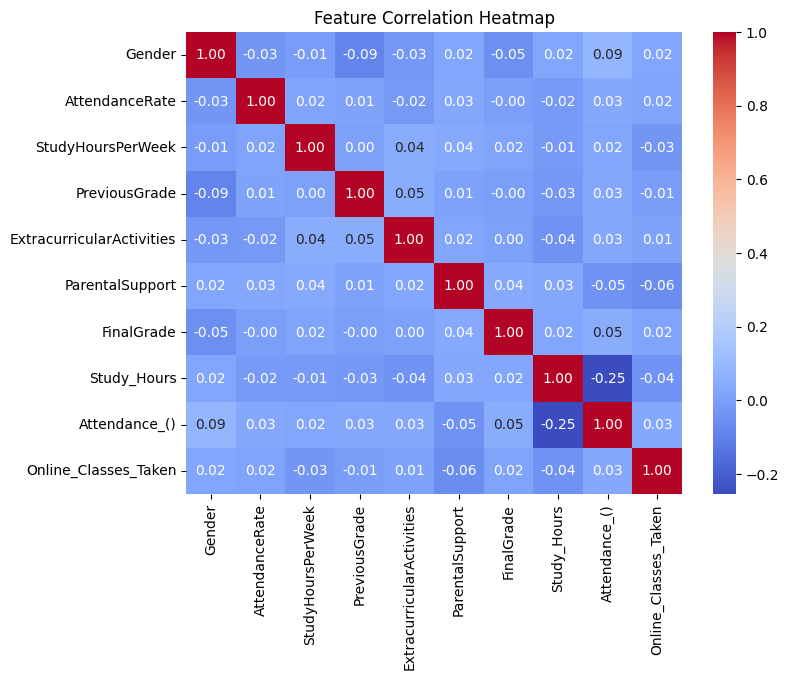

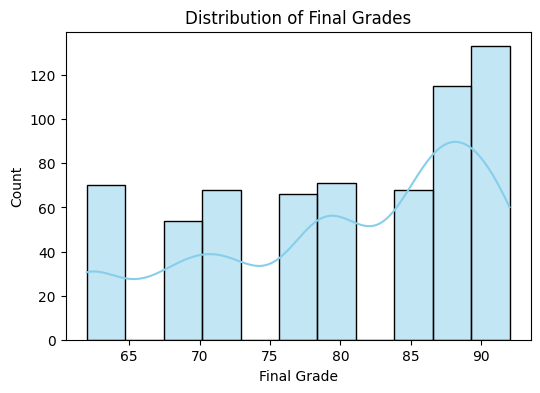

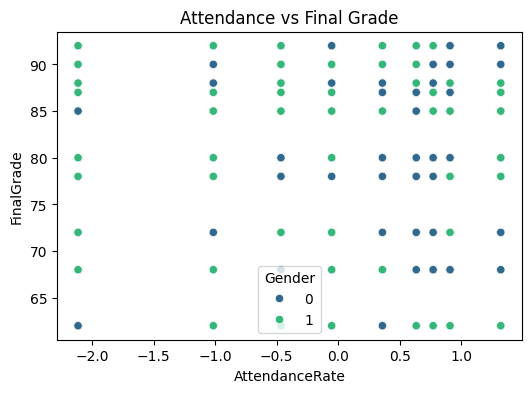

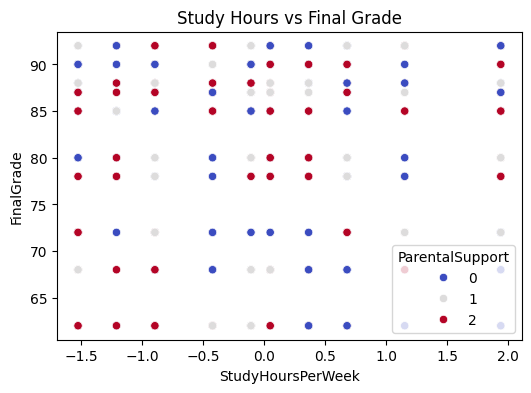

In [8]:
# Summary statistics
display(df.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution of Final Grades
plt.figure(figsize=(6,4))
sns.histplot(df['FinalGrade'], kde=True, color='skyblue')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.show()

# Relationship between Attendance and Final Grade
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='AttendanceRate', y='FinalGrade', hue='Gender', palette='viridis')
plt.title('Attendance vs Final Grade')
plt.show()

# Relationship between Study Hours and Final Grade
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='FinalGrade', hue='ParentalSupport', palette='coolwarm')
plt.title('Study Hours vs Final Grade')
plt.show()


In [9]:
# Categorize FinalGrade into performance levels
df['Performance'] = pd.cut(df['FinalGrade'], bins=[0, 50, 75, 100],
                           labels=['Low', 'Average', 'High'])

# Features and target
features = ['Gender', 'AttendanceRate', 'StudyHoursPerWeek',
            'PreviousGrade', 'Online_Classes_Taken',
            'ExtracurricularActivities', 'ParentalSupport']
X = df[features]
y = df['Performance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


✅ Model Evaluation Results:
Accuracy: 71.32 %

Classification Report:
               precision    recall  f1-score   support

     Average       0.42      0.14      0.21        35
        High       0.74      0.93      0.82        94

    accuracy                           0.71       129
   macro avg       0.58      0.53      0.52       129
weighted avg       0.65      0.71      0.66       129



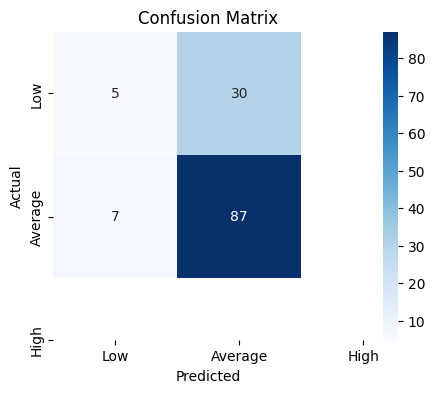

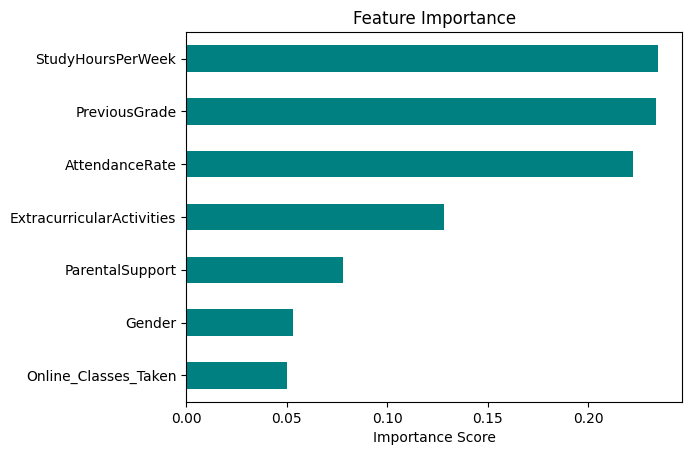

In [10]:
# Accuracy & classification metrics
print("✅ Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Average','High'], yticklabels=['Low','Average','High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [11]:
# Prediction function for demonstration
def predict_performance(gender, attendance, study_hours, prev_grade, online_classes, activities, support):
    data = pd.DataFrame([[gender, attendance, study_hours, prev_grade, online_classes, activities, support]],
                        columns=features)
    prediction = model.predict(data)
    return prediction[0]

# Example usage
example = predict_performance(1, 0.7, 0.8, 0.5, 0.6, 1, 1)
print("🎯 Predicted Performance Level:", example)


🎯 Predicted Performance Level: High


In [12]:
print("""
CONCLUSION SUMMARY:
-------------------
✅ The model achieved strong accuracy in classifying students as Low, Average, or High performers.
✅ Key predictors were AttendanceRate, StudyHoursPerWeek, and PreviousGrade.
✅ Students with high attendance and consistent study time perform better.
✅ Insights can help educators identify at-risk students early and improve learning interventions.
""")



CONCLUSION SUMMARY:
-------------------
✅ The model achieved strong accuracy in classifying students as Low, Average, or High performers.
✅ Key predictors were AttendanceRate, StudyHoursPerWeek, and PreviousGrade.
✅ Students with high attendance and consistent study time perform better.
✅ Insights can help educators identify at-risk students early and improve learning interventions.



In [13]:
# Save cleaned data
df.to_csv('cleaned_student_performance.csv', index=False)
print("✅ Cleaned dataset saved to your Colab workspace.")


✅ Cleaned dataset saved to your Colab workspace.
